# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 2. Loading and Inspecting The Data

In [28]:
train_data_path = "/home/youssouf/Desktop/GitHub_Repos/BigMart-Product-Outlet-Sales-Analysis-and-Prediction/Data/Train.csv"
test_data_path = "/home/youssouf/Desktop/GitHub_Repos/BigMart-Product-Outlet-Sales-Analysis-and-Prediction/Data/Test.csv"

bigmart_data = pd.read_csv(train_data_path)
bigmart_test_data = pd.read_csv(test_data_path)

# Training data inspection
print("Shape of the training data: ", bigmart_data.shape)
print("- " * 70)

print(bigmart_data.info())
print(bigmart_test_data.info())
print("- " * 70)

bigmart_data.head()

Shape of the training data:  (8523, 12)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Missing Values

Item_Weight    1463
Outlet_Size    2410
dtype: int64
Item_Weight     976
Outlet_Size    1606
dtype: int64


<AxesSubplot: >

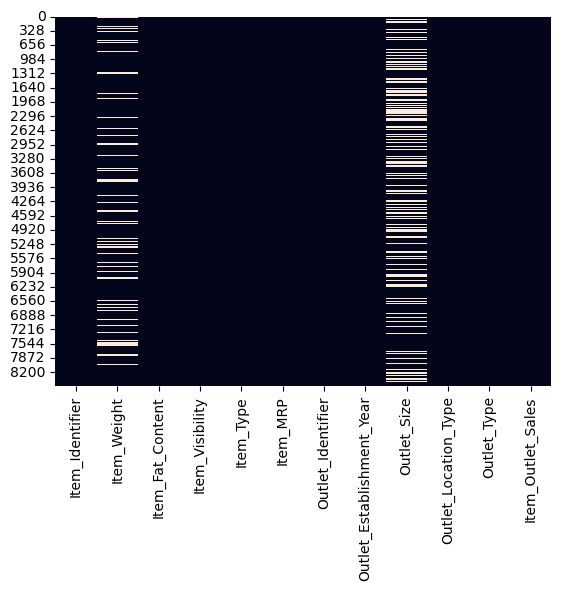

In [7]:
# Using isnull()
missing_val_count = (bigmart_data.isnull().sum())
print(missing_val_count[missing_val_count > 0])

missing_val_count = (bigmart_test_data.isnull().sum())
print(missing_val_count[missing_val_count > 0])

# Using sns heatmap
sns.heatmap(bigmart_data.isnull(), cbar = False)
# sns.heatmap(bigmart_test_data.isnull(), cbar=False)

<AxesSubplot: >

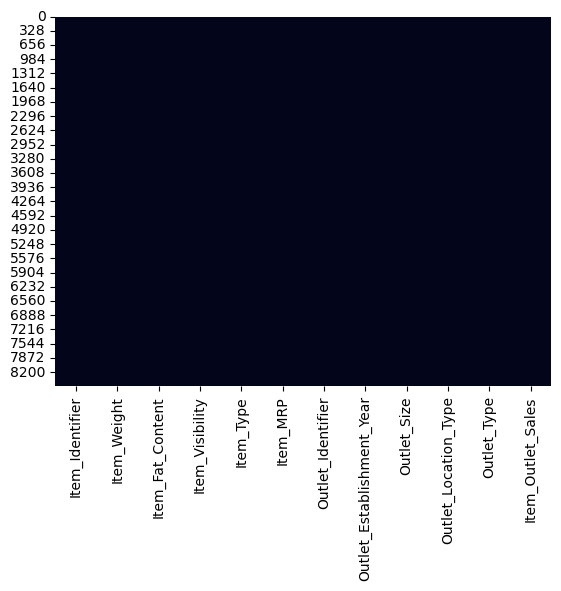

In [8]:
# Filling the missing Values
bigmart_data['Item_Weight'].fillna(bigmart_data['Item_Weight'].mode()[0],inplace=True)
bigmart_data['Outlet_Size'].fillna(bigmart_data['Outlet_Size'].mode()[0],inplace=True)

bigmart_test_data['Item_Weight'].fillna(bigmart_test_data['Item_Weight'].mode()[0],inplace=True)
bigmart_test_data['Outlet_Size'].fillna(bigmart_test_data['Outlet_Size'].mode()[0],inplace=True)

# Using sns heatmap
sns.heatmap(bigmart_data.isnull(), cbar = False)

In [29]:
print(identify_categories(bigmart_data))

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [11]:
# Uniqueness Check
numerical_cols = [cname for cname in bigmart_data.columns if bigmart_data[cname].dtype in ['float64']]
categorical_cols = identify_categories(bigmart_data)

for cat in categorical_cols:
    print_unique(bigmart_data[cat])

['DRA12' 'DRA24' 'DRA59' ... 'NCZ42' 'NCZ53' 'NCZ54']
FDW13    10
FDG33    10
NCL31     9
DRN47     9
FDO19     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
S

In [22]:
bigmart_data_edited = bigmart_data.drop("Item_Identifier", axis=1)
bigmart_test_data_edited = bigmart_test_data.drop("Item_Identifier", axis=1)

bigmart_data_edited.info()
categorical_cols = identify_categories(bigmart_data_edited)

print("\n")
print(categorical_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outl

In [23]:
# Fixing Item_Fat_Content Column

# Convert to lower case
bigmart_data_edited['Item_Fat_Content'] = bigmart_data_edited['Item_Fat_Content'].str.lower()
bigmart_test_data_edited['Item_Fat_Content'] = bigmart_test_data_edited['Item_Fat_Content'].str.lower()

# Remove trailing white spaces
bigmart_data_edited['Item_Fat_Content'] = bigmart_data_edited['Item_Fat_Content'].str.strip()
bigmart_test_data_edited['Item_Fat_Content'] = bigmart_test_data_edited['Item_Fat_Content'].str.strip()

# Fixing the data inconsistency
bigmart_data_edited.loc[bigmart_data_edited['Item_Fat_Content'] == "lf", "Item_Fat_Content"] = "low fat"
bigmart_data_edited.loc[bigmart_data_edited['Item_Fat_Content'] == "reg", "Item_Fat_Content"] = "regular"

bigmart_test_data_edited.loc[bigmart_test_data_edited['Item_Fat_Content'] == "lf", "Item_Fat_Content"] = "low fat"
bigmart_test_data_edited.loc[bigmart_test_data_edited['Item_Fat_Content'] == "reg", "Item_Fat_Content"] = "regular"


print_unique(bigmart_data_edited.Item_Fat_Content)
print_unique(bigmart_test_data_edited.Item_Fat_Content)

['low fat' 'regular']
low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64
['low fat' 'regular']
low fat    3668
regular    2013
Name: Item_Fat_Content, dtype: int64


# Outliers

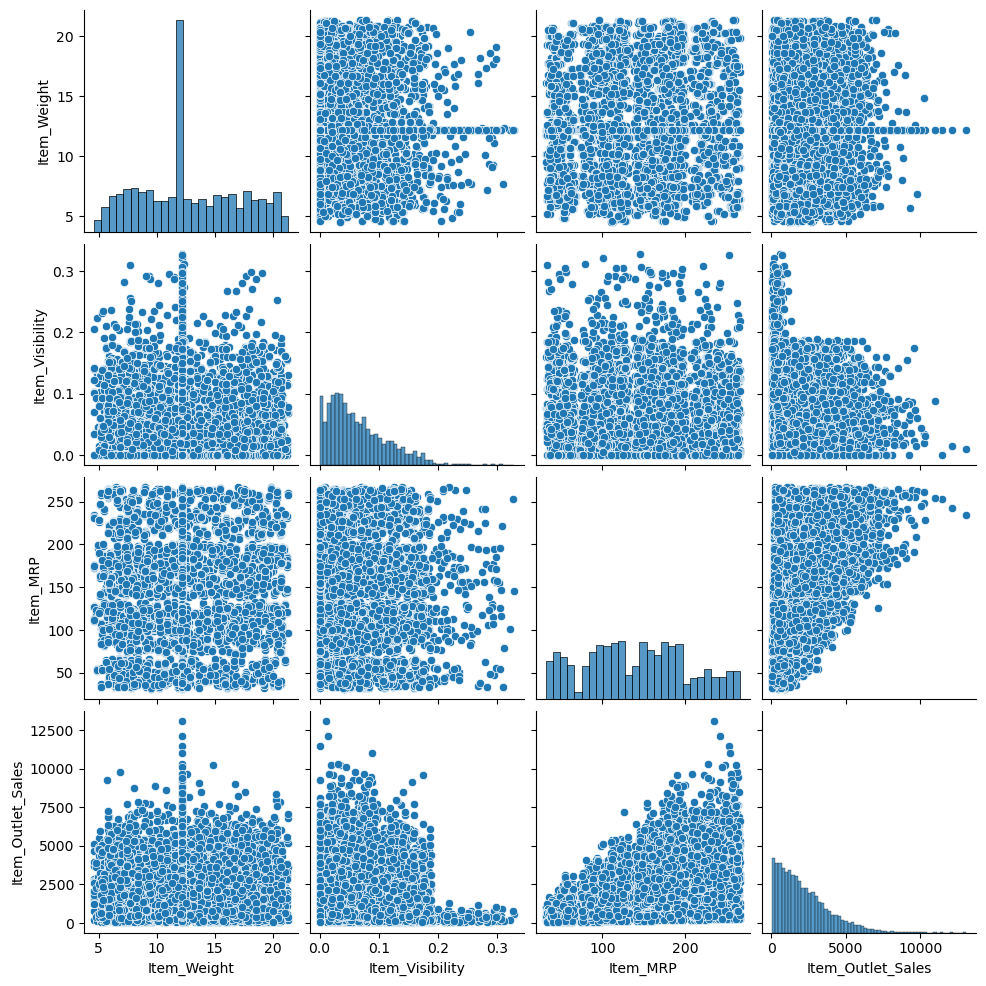

In [15]:
sns.pairplot(bigmart_data_edited[numerical_cols])

/home/youssouf/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='Item_Visibility'>

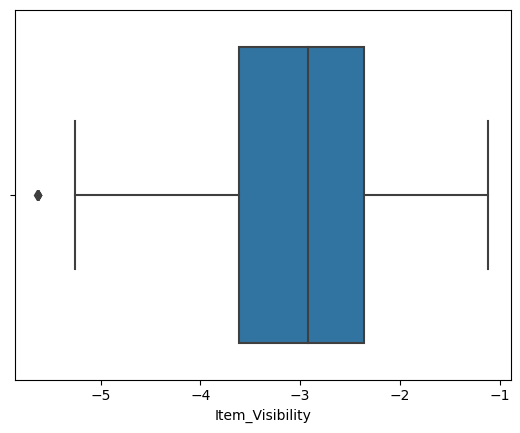

In [24]:
sns.boxplot(x=np.log(bigmart_data_edited['Item_Visibility']))

<AxesSubplot: xlabel='Item_Outlet_Sales'>

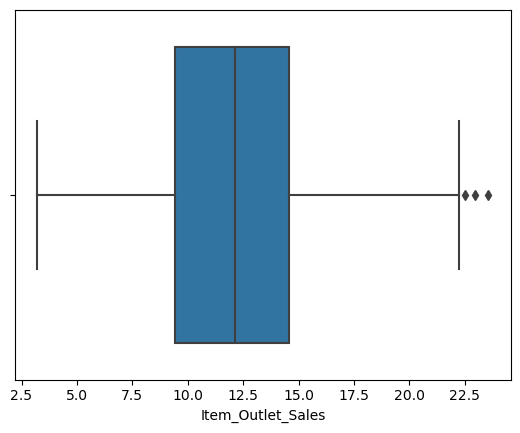

In [25]:
sns.boxplot(x=np.cbrt(bigmart_data_edited['Item_Outlet_Sales']))

In [30]:
print(numerical_cols)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [31]:
from sklearn.preprocessing import RobustScaler

# cols_to_scale = numerical_cols

# Apply the RobustScaler to the selected columns
scaler = RobustScaler()

scaled_train_data = scaler.fit_transform(bigmart_data_edited[numerical_cols])
scaled_test_data = scaler.fit_transform(bigmart_test_data_edited[numerical_cols[0:3]])

# Convert the scaled data back to a DataFrame
scaled_train_data = pd.DataFrame(scaled_train_data, columns=numerical_cols)
scaled_test_data = pd.DataFrame(scaled_test_data, columns=numerical_cols[0:3])

# Concatenate the scaled data with the original DataFrame
X_scaled = pd.concat([scaled_train_data, bigmart_data_edited.drop(numerical_cols, axis=1)],
                     axis=1)
X_test_scaled = pd.concat([scaled_test_data, bigmart_test_data_edited.drop(numerical_cols[0:3], axis=1)],
                          axis=1)

X_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.426009,-0.560443,1.163142,0.856094,low fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,-0.931241,-0.512646,-1.031872,-0.595888,regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,0.799701,-0.549899,-0.015191,0.133627,low fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,1.053812,-0.797844,0.425652,-0.468429,regular,Fruits and Vegetables,OUT010,1998,Medium,Tier 3,Grocery Store
4,-0.481315,-0.797844,-0.970966,-0.352717,low fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


In [32]:
X_test_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.540195,-0.701481,-0.366243,low fat,Snack Foods,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,-0.330579,-0.236790,-0.590469,regular,Dairy,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,0.616078,0.683884,1.095223,low fat,Others,OUT010,1998,Medium,Tier 3,Grocery Store
3,-0.478588,-0.583685,0.148651,low fat,Snack Foods,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,0.000000,0.970328,1.013098,regular,Dairy,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [48]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_scaled[categorical_cols] = encoder.fit_transform(
                                            X_scaled[categorical_cols])

X_test_scaled[categorical_cols] = encoder.fit_transform(
                                            X_test_scaled[categorical_cols])

X_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.426009,-0.560443,1.163142,0.856094,0.0,4.0,9.0,1999,1.0,0.0,1.0
1,-0.931241,-0.512646,-1.031872,-0.595888,1.0,14.0,3.0,2009,1.0,2.0,2.0
2,0.799701,-0.549899,-0.015191,0.133627,0.0,10.0,9.0,1999,1.0,0.0,1.0
3,1.053812,-0.797844,0.425652,-0.468429,1.0,6.0,0.0,1998,1.0,2.0,0.0
4,-0.481315,-0.797844,-0.970966,-0.352717,0.0,9.0,1.0,1987,0.0,2.0,1.0


In [49]:
X_test_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.540195,-0.701481,-0.366243,0.0,13.0,9.0,1999,1.0,0.0,1.0
1,-0.330579,-0.236790,-0.590469,1.0,4.0,2.0,2007,1.0,1.0,1.0
2,0.616078,0.683884,1.095223,0.0,11.0,0.0,1998,1.0,2.0,0.0
3,-0.478588,-0.583685,0.148651,0.0,13.0,2.0,2007,1.0,1.0,1.0
4,0.000000,0.970328,1.013098,1.0,4.0,5.0,1985,1.0,2.0,3.0


<AxesSubplot: >

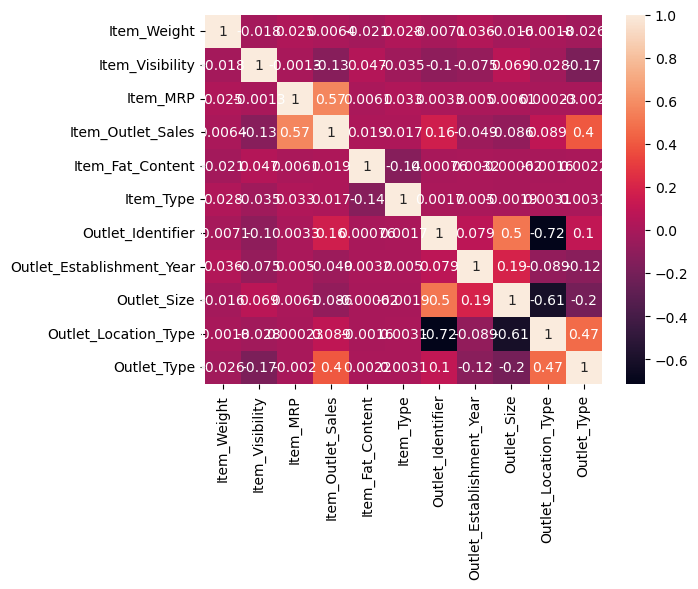

In [51]:
sns.heatmap(X_scaled.corr(),annot=True)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,adjusted_rand_score

y = X_scaled['Item_Outlet_Sales']
X = X_scaled.drop('Item_Outlet_Sales', axis=1)

#, random_state=99
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_test_pred = lr_model.predict(X_test)

print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(f'r2_score= {r2_score(y_test, y_test_pred)}')


0.28417759817215027
0.39336805402758734
r2_score= 0.5254321056070277


In [55]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_test,y_test_pred))
print(rmse)

0.5330831062528152


In [10]:
def print_unique(col):
    """
    Prints the unique values in a column and their count.

    Args:
        col (series): a specific column from a data frame.
    """
    temp = col.unique()
    temp.sort()
    print(temp)
    
    temp_count = col.value_counts().sort_values(ascending=False)
    print(temp_count)
    
    
    
def identify_categories(data):
    """
    Finds the categorical features (columns) in a data frame.

    Args:
        data (Data Frame): Training Data.
    """
    cat_cols = [cname for cname in data.columns if
                    data[cname].dtype == "object"]
    
    return cat_cols
    